<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [182]:
# type your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sqs
from sklearn.feature_selection import RFE

from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

#### Load the first dataset and check the first two observations

In [183]:
# load your data
# type your code here

df_wine = pd.read_csv('winequality-white.csv',sep=';')

df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [184]:
# check data types of variables
# type your code here

df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [185]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

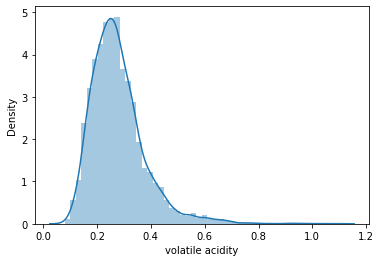

In [186]:
sns.distplot(df_wine['volatile acidity'])
plt.show()

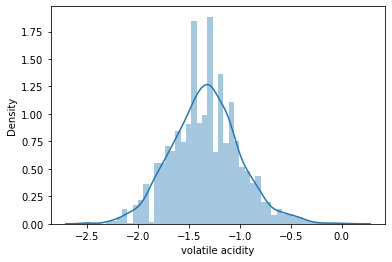

In [187]:
sns.distplot(np.log(df_wine['volatile acidity']))
plt.show()

In [188]:
print(df_wine['volatile acidity'].skew())
print(np.log(df_wine['volatile acidity']).skew())

1.5769795029952025
0.13938315393329148


In [189]:
# The Feature 'volatile acidity' needs transformation as the distribution is Right skewed
# The Skewness value seems to be more than 1

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

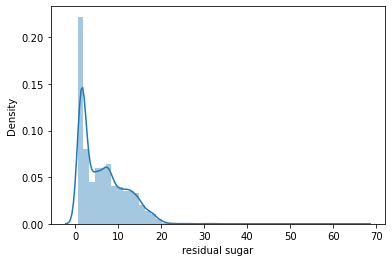

In [190]:
sns.distplot(df_wine['residual sugar'])
plt.show()

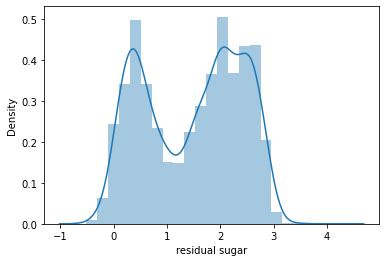

In [191]:
sns.distplot(np.log(df_wine['residual sugar']))
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [193]:
# std() or var()
# if std = 0, the values are constant

In [194]:
df_wine.std()

fixed acidity            0.843868
volatile acidity         0.100795
citric acid              0.121020
residual sugar           5.072058
chlorides                0.021848
free sulfur dioxide     17.007137
total sulfur dioxide    42.498065
density                  0.002991
pH                       0.151001
sulphates                0.114126
alcohol                  1.230621
quality                  0.885639
dtype: float64

In [195]:
# Chlorides, density  will not contribute for the model. They add little info

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [196]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

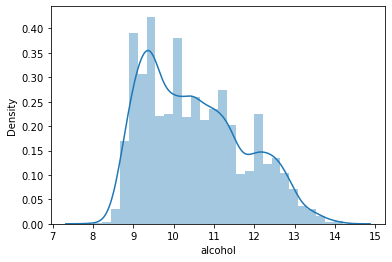

0.4873419932161276


In [197]:
sns.distplot(df_wine['alcohol'])
plt.show()

print(df_wine['alcohol'].skew())

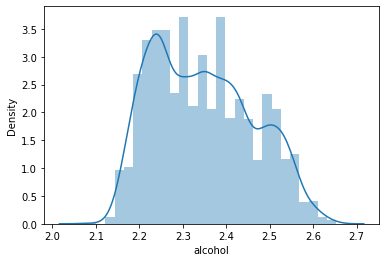

0.310134622964236


In [198]:
sns.distplot(np.log(df_wine['alcohol']))
plt.show()

print(np.log(df_wine['alcohol']).skew())

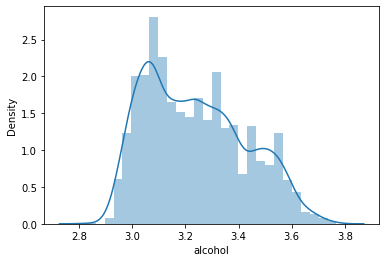

0.3978909427590142


In [199]:
sns.distplot(np.sqrt(df_wine['alcohol']))
plt.show()

print(np.sqrt(df_wine['alcohol']).skew())


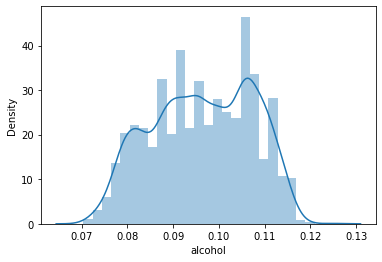

-0.13935230629934492


In [200]:
sns.distplot((1/df_wine['alcohol']))
plt.show()

print((1/df_wine['alcohol']).skew())


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
# No 
# original pH value - Train model
# scaled PH - Train model

# comparsion

In [51]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'residual_sugar_log'],
      dtype='object')

In [82]:
df_wine.isnull().sum()

# No Null Values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [201]:
X = df_wine.drop('quality',axis=1)

Y = df_wine['quality']

In [203]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

print("X_train :",X_train.shape)
print("Y_train :",Y_train.shape)
print("X_test :",X_test.shape)
print("Y_test : ",Y_test.shape)

X_train : (3428, 11)
Y_train : (3428,)
X_test : (1470, 11)
Y_test :  (1470,)


In [204]:
mlr_full_model = sm.OLS(Y_train,X_train).fit()

print(mlr_full_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.871e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:06:41   Log-Likelihood:                         -3918.6
No. Observations:                3428   AIC:                                      7859.
Df Residuals:                    3417   BIC:                                      7927.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [56]:
import scipy.stats as st

In [205]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train['pH'] = sc.fit_transform(X_train[['pH']])

In [206]:

mlr_scaled_model = sm.OLS(Y_train,X_train).fit()

print(mlr_scaled_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.871e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:07:06   Log-Likelihood:                         -3918.7
No. Observations:                3428   AIC:                                      7859.
Df Residuals:                    3417   BIC:                                      7927.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [209]:
print(np.format_float_positional(X_train['pH'].mean()))
print(X_train['pH'].std())

-0.00000000000000037251415487860417
1.0001458895623807


In [ ]:
# No Difference in r2 or adj_r2

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
# corr()
# heatmap
# vif
# Drop

In [211]:
corr_mat  = df_wine.corr()

corr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


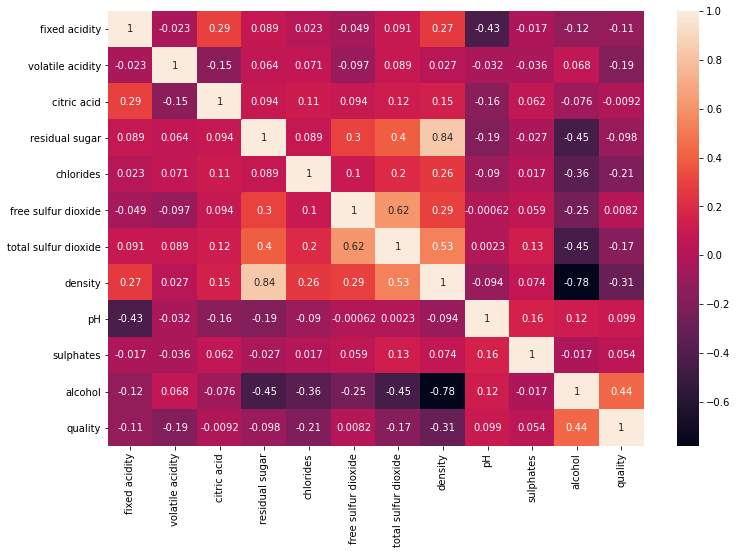

In [212]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat,annot=True)
plt.show()

In [213]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [216]:
vif =pd.DataFrame()
vif['Feature']= df_wine.columns

In [223]:
vif['VIF_Score']  = [variance_inflation_factor(df_wine.values,i) for i in range(df_wine.shape[1])]

In [224]:
vif.sort_values(ascending=False,by='VIF_Score')

# Alchol,Ph, Density can be dropped

,Feature,VIF_Score
7,density,1063.719650
8,pH,610.368109
10,alcohol,144.967476
0,fixed acidity,93.075475
11,quality,61.934404
6,total sulfur dioxide,25.009085
9,sulphates,20.604027
1,volatile acidity,10.319377
2,citric acid,10.007304
5,free sulfur dioxide,9.323343


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [90]:
# We already have
# residuals = errors
# errors are normally distributed or not
# residuals ---> QQ plot

In [225]:
# type your code here

mlr_full_model = sm.OLS(Y_train,X_train).fit()

print(mlr_full_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.871e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:12:17   Log-Likelihood:                         -3918.7
No. Observations:                3428   AIC:                                      7859.
Df Residuals:                    3417   BIC:                                      7927.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

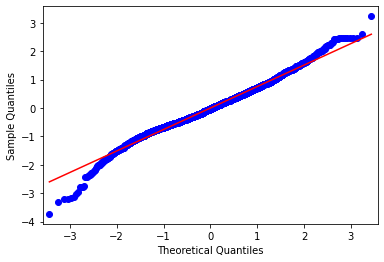

In [226]:
qqplot(mlr_full_model.resid,line='r')
plt.show()

In [227]:
# Normality detected

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [228]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [229]:
# No , it wont affect much 

X_train['citric acid'] =  np.log1p(X_train['citric acid'])

mlr_scaled_model = sm.OLS(Y_train,X_train).fit()

print(mlr_scaled_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.871e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):                        0.00
Time:                        16:12:32   Log-Likelihood:                         -3918.7
No. Observations:                3428   AIC:                                      7859.
Df Residuals:                    3417   BIC:                                      7927.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [97]:
X_train.columns

Index(['const', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

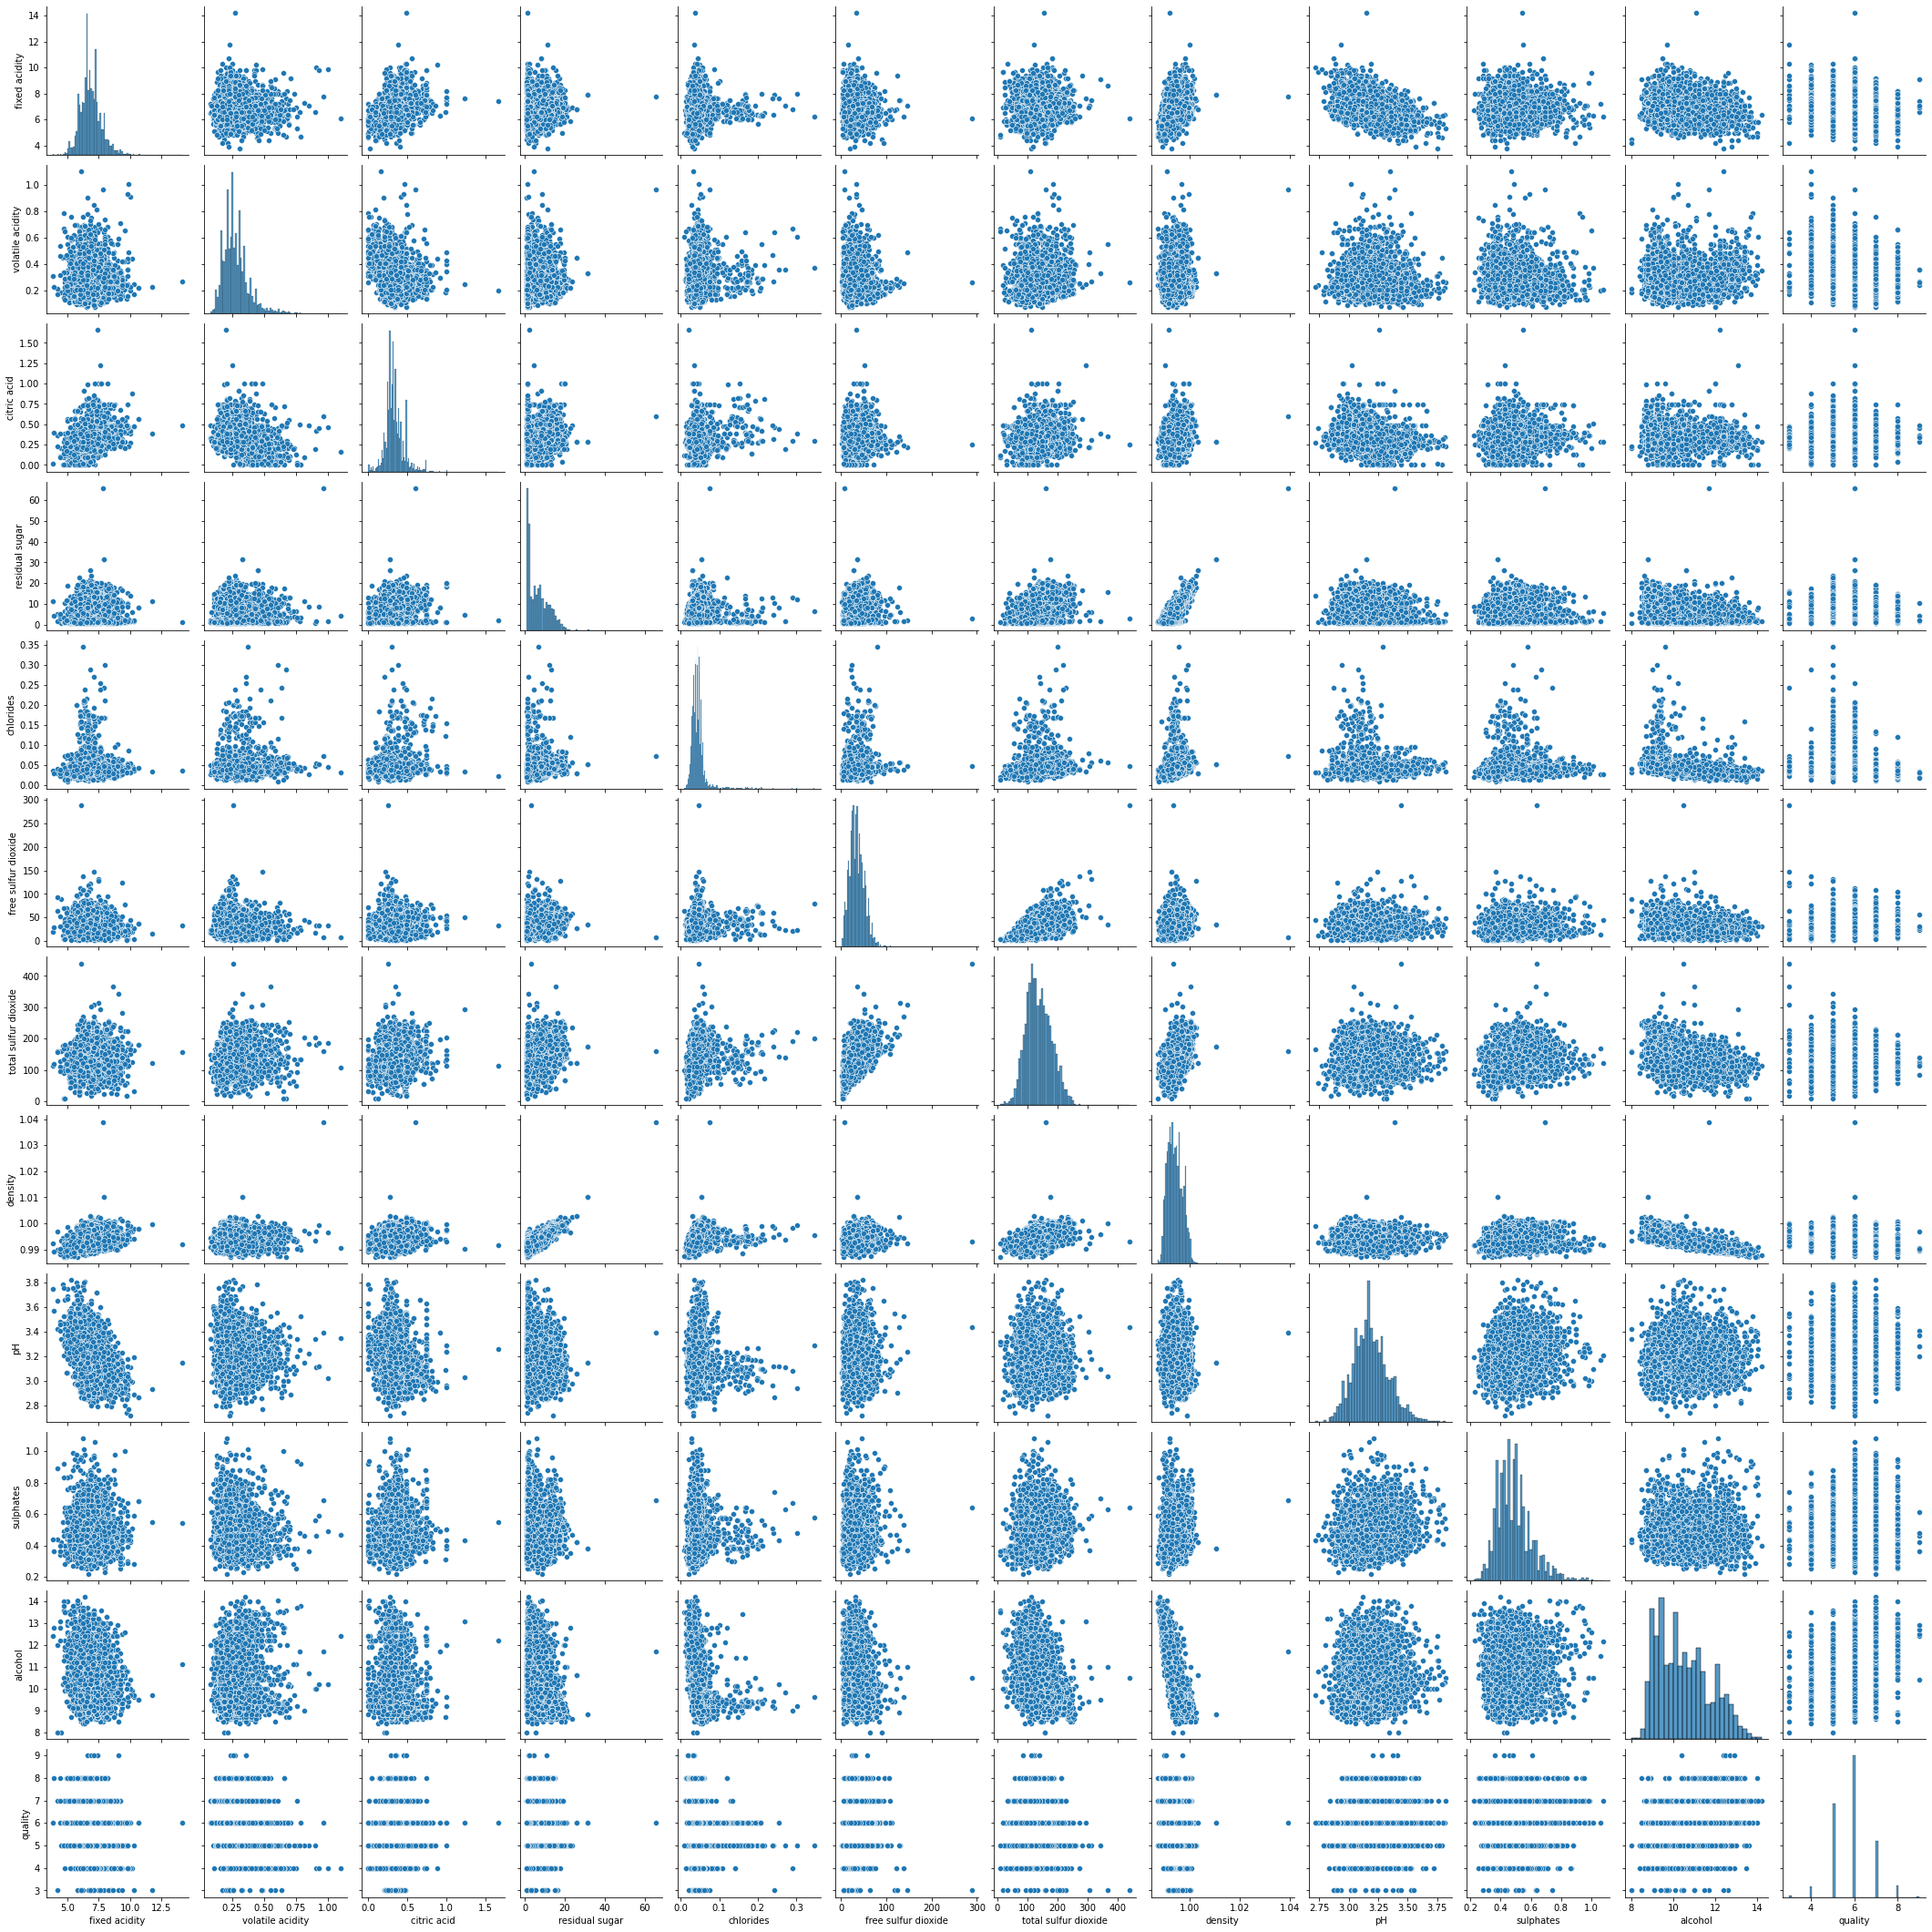

In [107]:
sns.pairplot(df_wine)
plt.show()

In [108]:
# No Feature has a convincing linear relationship with the target (target is categorical)

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [230]:
# hint: LinearRegression from sklearn
# sfs --> Object -> LinearRegression -> select 5

In [231]:
linreg = LinearRegression()

linreg_forward = sqs(estimator = linreg , k_features = 5,forward = True,
                verbose = 2, scoring = 'r2')

sfs_forward = linreg_forward.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2022-02-20 16:14:01] Features: 1/5 -- score: 0.19251830225451422[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2022-02-20 16:14:01] Features: 2/5 -- score: 0.24160101350544885[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2022-02-20 16:14:01] Features: 3/5 -- score: 0.25911235791545567[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [232]:
print(sfs_forward.k_feature_names_)
print(sfs_forward.k_score_)

('volatile acidity', 'residual sugar', 'density', 'sulphates', 'alcohol')
0.2731440837025253


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [233]:
linreg_backward = sqs(estimator = linreg , k_features = 5,forward = False,
                verbose = 2, scoring = 'r2')

sfs_backward = linreg_backward.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2022-02-20 16:14:23] Features: 10/5 -- score: 0.27986014152067584[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2022-02-20 16:14:23] Features: 9/5 -- score: 0.2802142640929638[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2022-02-20 16:14:23] Features: 8/5 -- score: 0.28035658307347805[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [234]:
sfs_backward.k_score_

0.2731440837025253

In [235]:
# There is no difference in r2. It depends on train_test_split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [236]:
linreg_f = sqs(estimator = linreg , k_features = (2,6),forward = True,
             verbose = 2, scoring = 'r2')

sfs_f= linreg_f.fit(X_train,Y_train)

sfs_f.k_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2022-02-20 16:15:24] Features: 1/6 -- score: 0.19251830225451422[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2022-02-20 16:15:24] Features: 2/6 -- score: 0.24160101350544885[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2022-02-20 16:15:24] Features: 3/6 -- score: 0.25911235791545567[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

0.2783956343320482

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [237]:
linreg_f_best = sqs(estimator = linreg , k_features = 'best',forward = True,
             verbose = 2, scoring = 'r2')

sfs_f_best= linreg_f_best.fit(X_train,Y_train)

sfs_f_best.k_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2022-02-20 16:15:33] Features: 1/11 -- score: 0.19251830225451422[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2022-02-20 16:15:33] Features: 2/11 -- score: 0.24160101350544885[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-02-20 16:15:34] Features: 3/11 -- score: 0.25911235791545567[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

0.28035658307347805

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [238]:
linreg_b_best = sqs(estimator = linreg , k_features = 'best',forward = False,
             verbose = 2, scoring = 'r2')

sfs_f_best= linreg_b_best.fit(X_train,Y_train)

sfs_f_best.k_score_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2022-02-20 16:15:40] Features: 10/1 -- score: 0.27986014152067584[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2022-02-20 16:15:40] Features: 9/1 -- score: 0.2802142640929638[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2022-02-20 16:15:41] Features: 8/1 -- score: 0.28035658307347805[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

0.28035658307347805

In [239]:
# No Difference in the r2

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [240]:
import sklearn
sklearn.__version__

'0.23.2'

In [241]:
rfe_model = RFE(estimator=linreg,n_features_to_select=5)

rfe_model = rfe_model.fit(X_train,Y_train)

imp_features = pd.DataFrame()

imp_features['Features'] =  X_train.columns
imp_features['Ranking'] =  rfe_model.ranking_
imp_features

,Features,Ranking
0,fixed acidity,4
1,volatile acidity,1
2,citric acid,2
3,residual sugar,1
4,chlorides,5
5,free sulfur dioxide,6
6,total sulfur dioxide,7
7,density,1
8,pH,3
9,sulphates,1


In [243]:
imp_features.sort_values(by = 'Ranking', ascending = True)

,Features,Ranking
1,volatile acidity,1
3,residual sugar,1
7,density,1
9,sulphates,1
10,alcohol,1
2,citric acid,2
8,pH,3
0,fixed acidity,4
4,chlorides,5
5,free sulfur dioxide,6


In [247]:
imp_feat_list = list(imp_features[imp_features['Ranking'] == 1].Features)
print(imp_feat_list)

['volatile acidity', 'residual sugar', 'density', 'sulphates', 'alcohol']


In [249]:
linreg = LinearRegression()
linreg.fit(X_train[imp_feat_list], Y_train)
linreg.score(X_train[imp_feat_list], Y_train)

0.27598965659606467

In [250]:
linreg.score(X_test[imp_feat_list], Y_test)

0.2545973516204375

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [251]:
y_pred_train = linreg.predict(X_train[imp_feat_list])
y_pred_test = linreg.predict(X_test[imp_feat_list])

In [252]:
from sklearn.metrics import mean_squared_error

In [255]:
print(np.sqrt(mean_squared_error(Y_train, y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, y_pred_test)))

# No overfitting detected


0.758504940459757
0.7524587549411385


<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [256]:
df_wine['pH'].describe()

# all are acidic
# No Contribute to model

count    4898.000000
mean        3.188267
std         0.151001
min         2.720000
25%         3.090000
50%         3.180000
75%         3.280000
max         3.820000
Name: pH, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [257]:
cross_val_score(estimator = LinearRegression(),X=X_train,y=Y_train,cv=3,scoring='r2')

array([0.2633154 , 0.3078544 , 0.26821695])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [258]:
cross_val_score(estimator = LinearRegression(),X=X_train,y=Y_train,cv=5,scoring='r2')

array([0.28226505, 0.2901914 , 0.28306953, 0.30125089, 0.24025581])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [259]:
from sklearn.metrics import mean_squared_error

In [260]:
loocv = LeaveOneOut()

rmse_list = []

for train_idx, test_idx in loocv.split(X_train):
    X_train_l, X_test_l = X_train.iloc[train_idx], X_train.iloc[test_idx]
    Y_train_l, Y_test_l = Y_train.iloc[train_idx], Y_train.iloc[test_idx]
    linreg = LinearRegression()
    linreg.fit(X_train_l, Y_train_l)
    Y_pred_l = linreg.predict(X_test_l)
    
    # print(np.sqrt(mean_squared_error(y_test_l, y_pred_l)))
    rmse_list.append(np.sqrt(mean_squared_error(Y_test_l, Y_pred_l)))

In [261]:
np.array(rmse_list).mean()

0.5857048492215622